In [3]:
%run -n main.py
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
%run -n main.py
users = list(load_users()) + [USLACKBOT]
id_users = {_.id: _ for _ in users}

channels = list(load_channels(id_users))
id_channels = {_.id: _ for _ in channels}

messages = load_messages(log_progress(channels, every=1), id_users, id_channels)
messages = sorted(messages, key=lambda _: _.posted)

In [5]:
messages[0].posted, messages[-1].posted

(datetime.datetime(2015, 3, 12, 10, 57, 25),
 datetime.datetime(2017, 9, 12, 22, 24, 49, 461))

In [6]:
text_messages = [_ for _ in messages if _.type == TEXT]

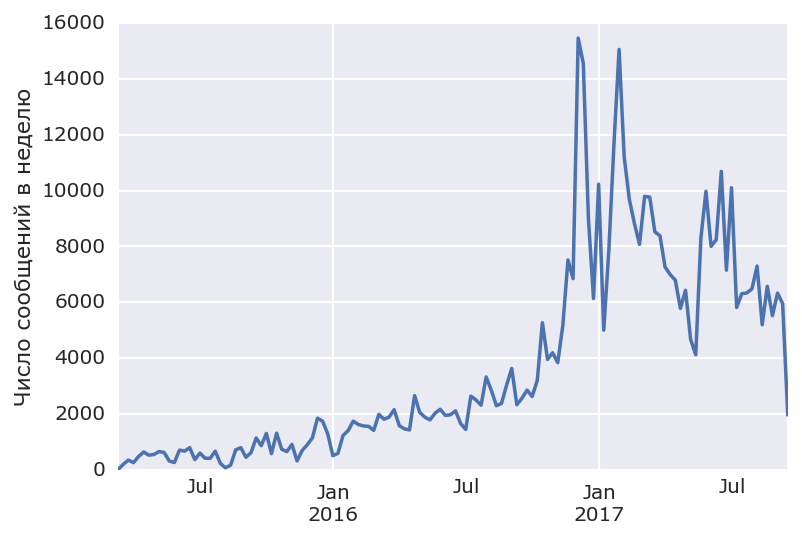

In [7]:
%run -n main.py
show_messages_per_week(text_messages)

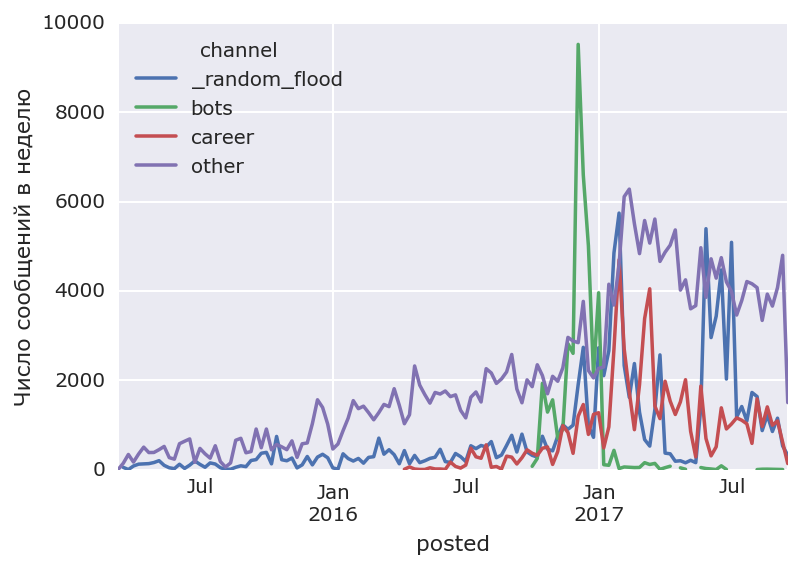

In [6]:
%run -n main.py
show_messages_per_week_in_bots_flood(text_messages)

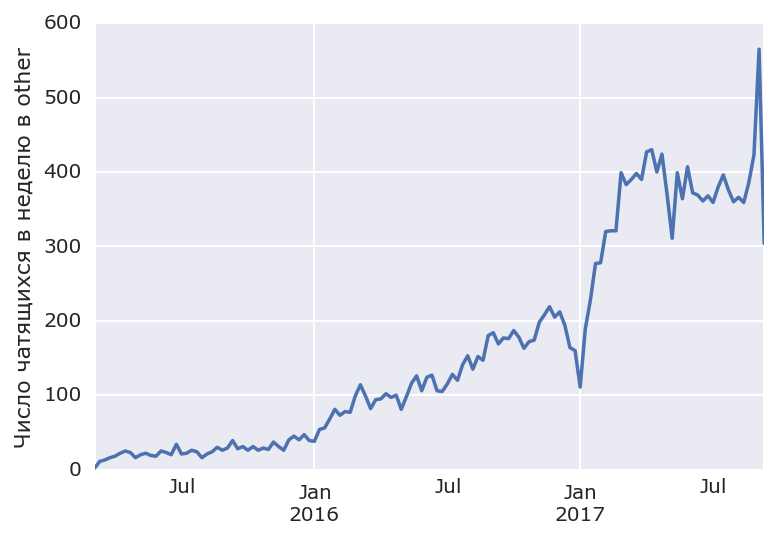

In [7]:
%run -n main.py
show_users_per_week(text_messages)

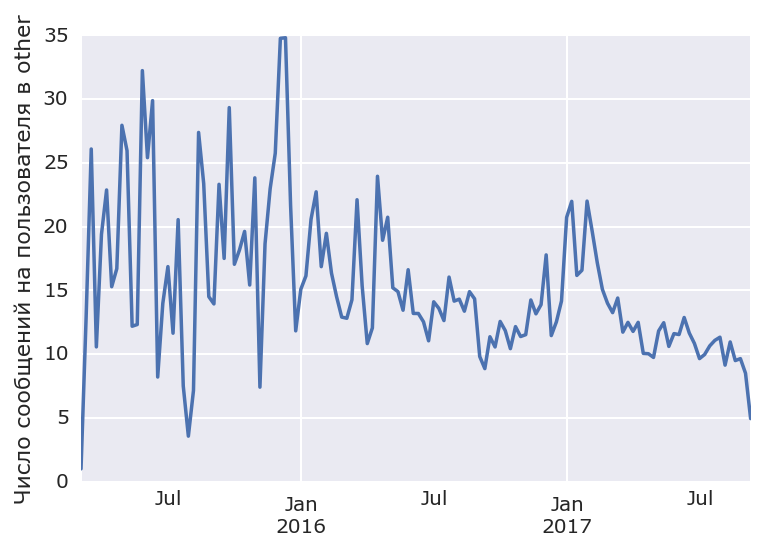

In [8]:
show_messages_per_user_per_week(text_messages)

4 . Интересно просто разглядывать, в каком порядке появлялись каналы. Можно дополнить этот список комментариями: что зачем было создано

1 _general 2 _random_flood 3 lang_r 4 _meetings 5 kaggle_crackers
6 proj_dota2 7 lang_python 8 lang_javascript 9 devops 10 visualization
11 theory_and_practice 12 deep_learning 13 _jobs 14 edu_courses 15 gis
16 conference 17 nlp 18 interesting_links 19 deephack 20 network_analysis
21 big_data 22 _random_politics 23 data_fest 24 ods_site 25 z_bots
26 business 27 _meetings_spb 28 engineering-hiring 29 edu_academy 30 datasets
31 _meetings_siberia 32 _general_en 33 bioinformatics 34 cloud 35 welcome
36 lang_julia 37 career 38 kaggle_avito_2017 39 _meetings_ukraine 40 _meetings_nsfw
41 novosibirsk 42 org_hse_projects 43 lang_lua_torch 44 reinforcement_learnin 45 blackoxchallenge
46 rnn 47 trading 48 traiding 49 kaggle_expedia_hotel 50 deep
51 org_nips_goldi 52 edu_books 53 _call_4_collaboration 54 sequences_series 55 spark
56 mltrainings_live 57 hackathon 58 ods_editors 59 sandbox 60 proj_benchr
61 ods_digests 62 ods-digests 63 work 64 bayesian 65 mltrainings_beginners
66 ium 67 lang_scala 

/Users/alexkuk/envs/mypy/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


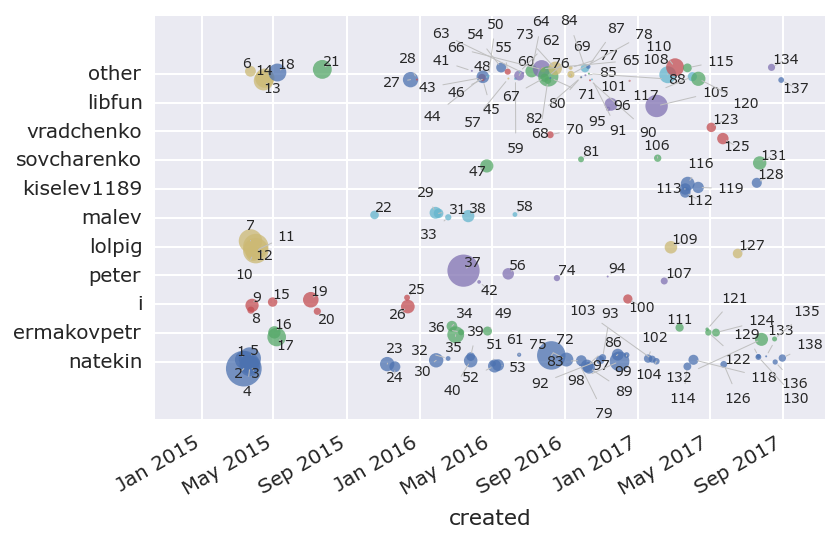

In [9]:
%run -n main.py
show_channels_created(channels, text_messages)

5 . Отдельно на bots, random_flood, carred уже смотрели. Интересно посмотреть и на остальные каналы. Можно повспоминать объяснения для пиков, отметить какие каналы и растут, какие стагнируют

/Users/alexkuk/envs/mypy/lib/python2.7/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2422.0, right=2422.0
  'left=%s, right=%s') % (left, right))
/Users/alexkuk/envs/mypy/lib/python2.7/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2398.0, right=2398.0
  'left=%s, right=%s') % (left, right))


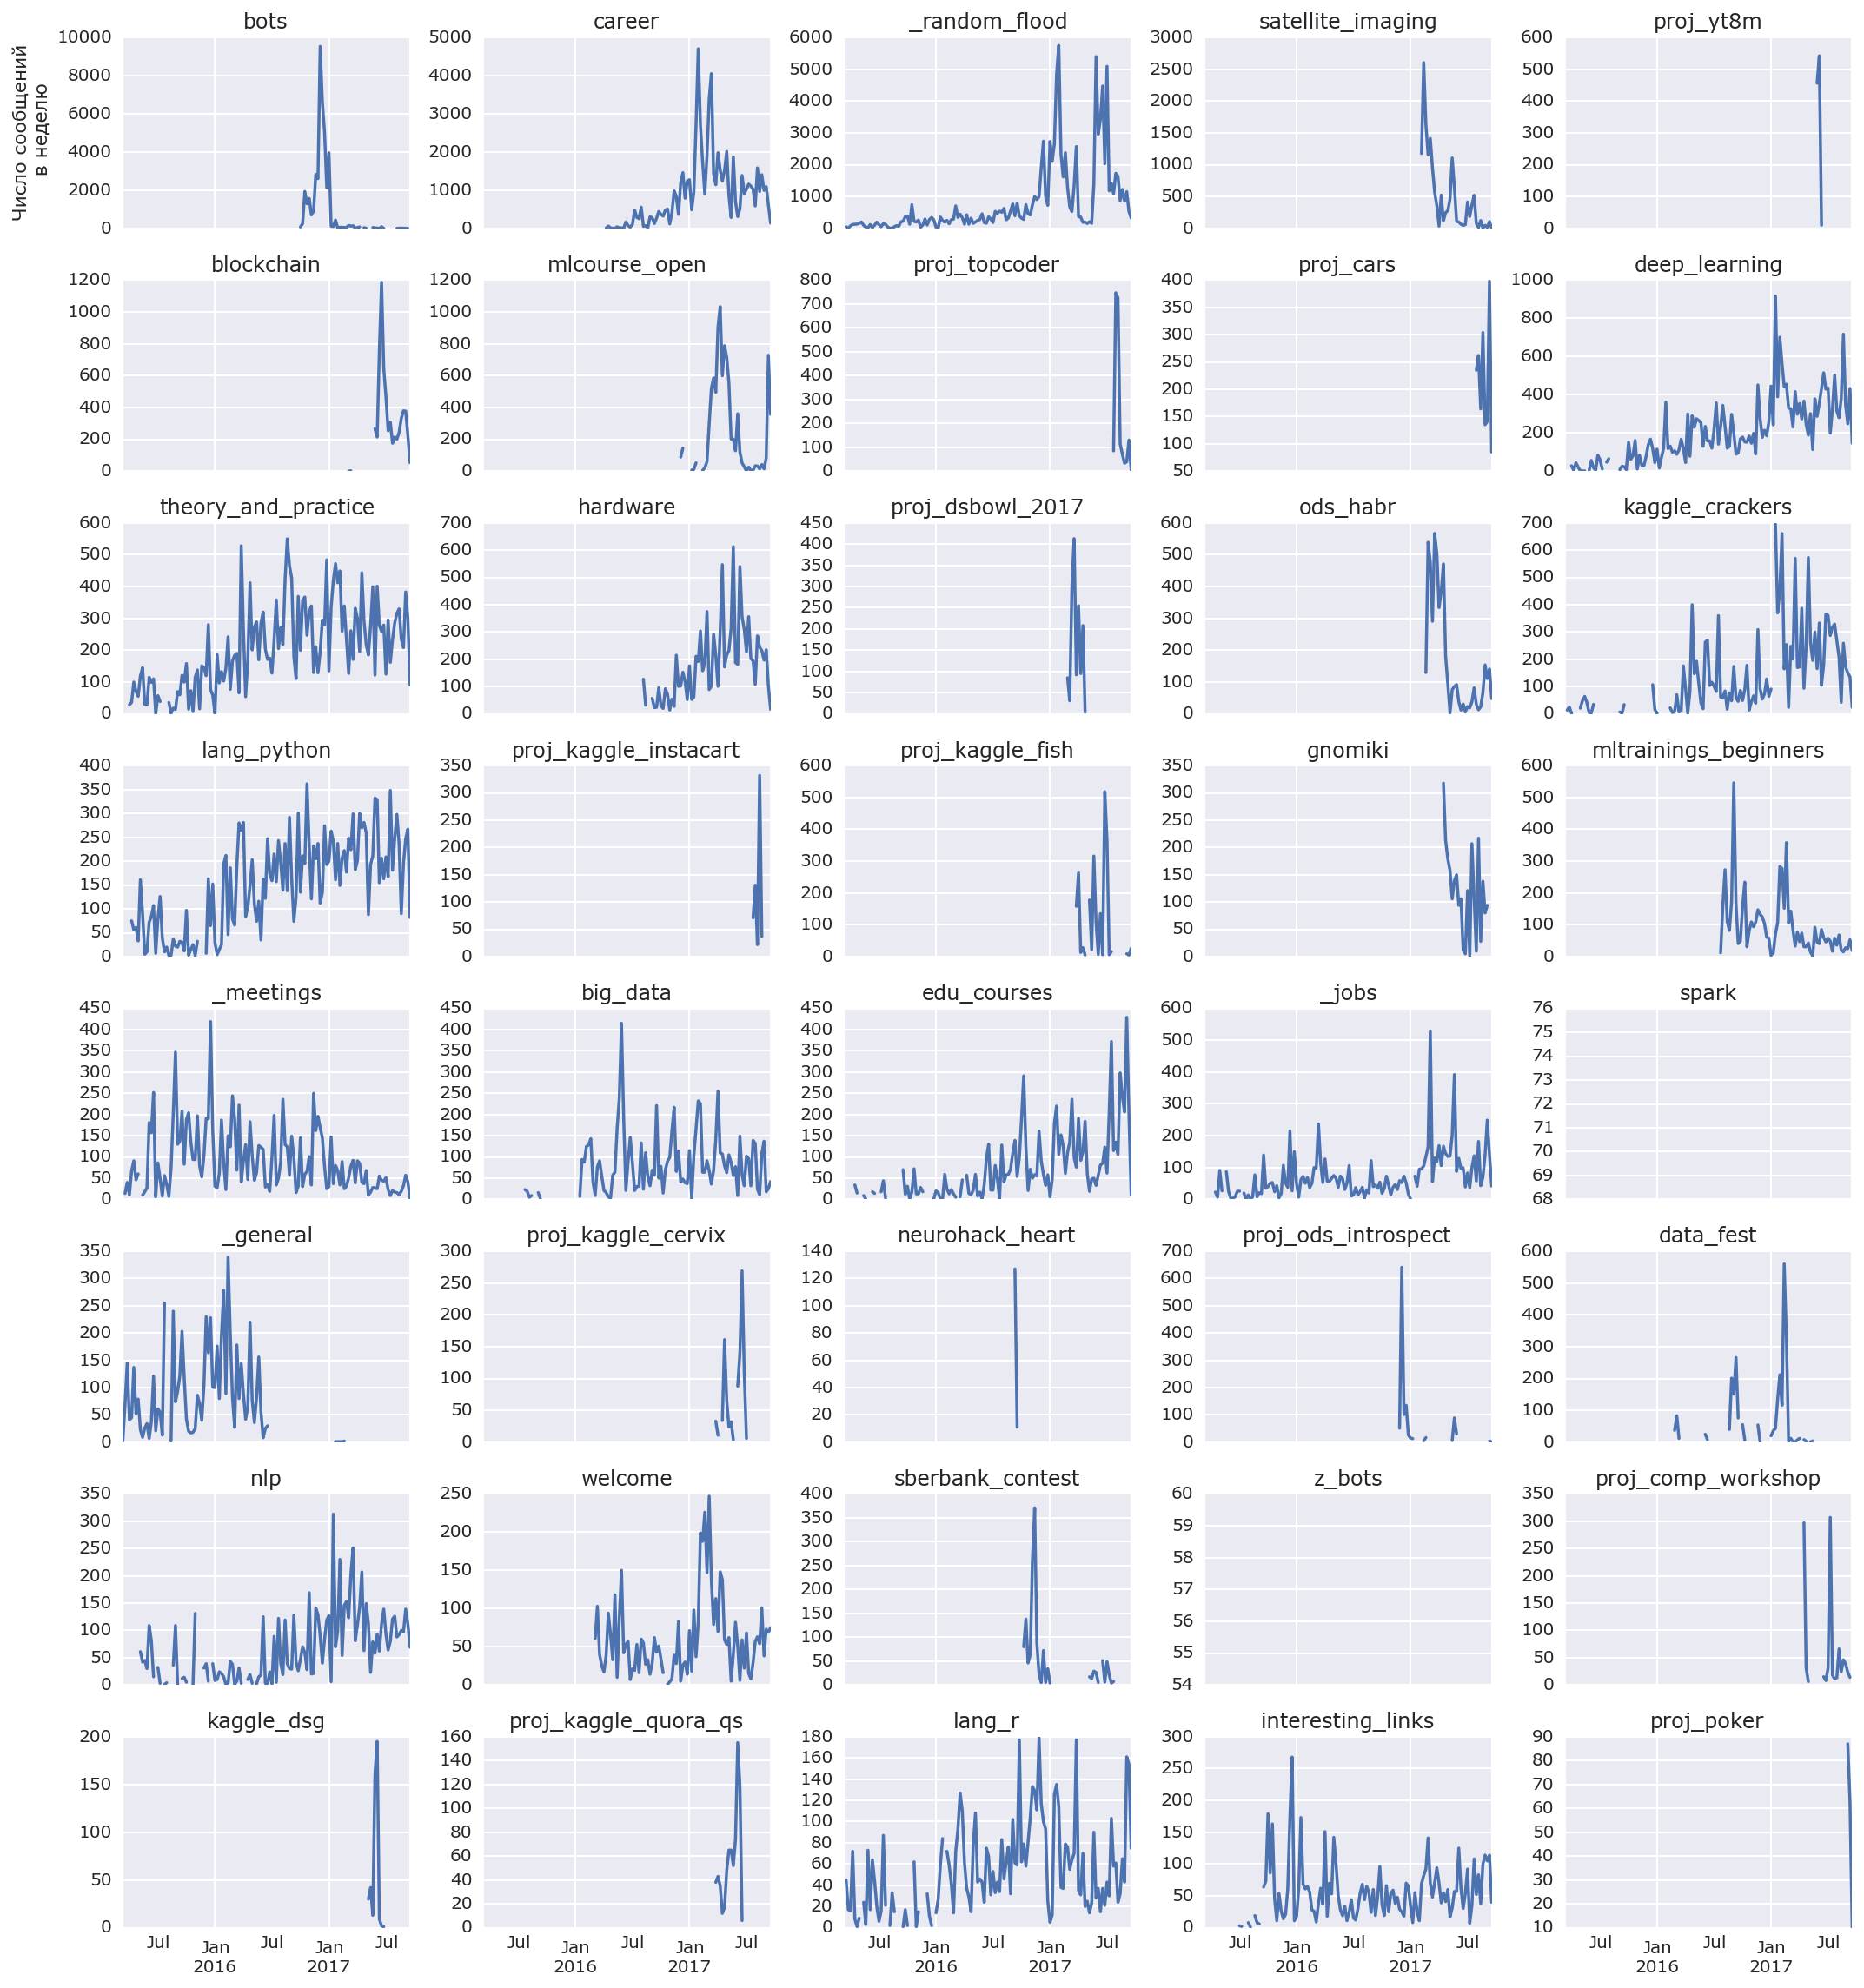

In [10]:
%run -n main.py
show_messages_per_week_by_channels(text_messages)

6 . В 2015 году в месяц приходило в среднем 20-30 новых пользователей. Начиная с января 2016 года тренд сменился, начался рост. Отчего так произошло? В 2016-12 неполные данные, поэтому спад

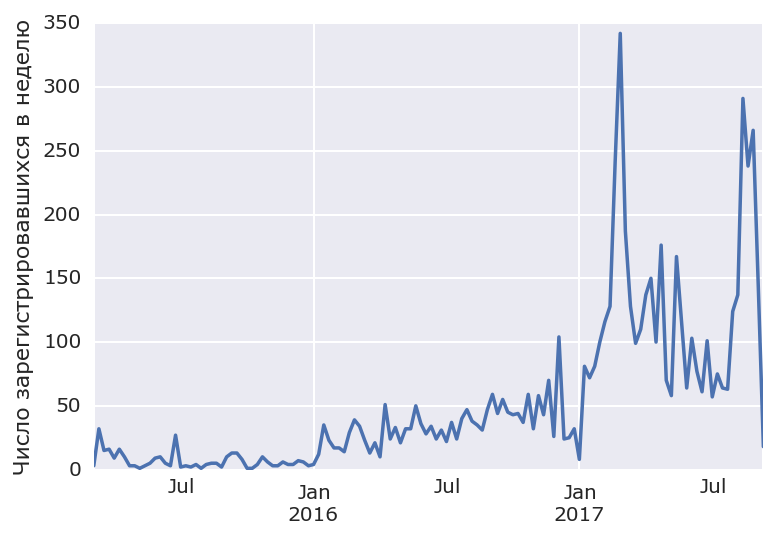

In [11]:
%run -n main.py
show_users_join(messages)

7 . Сложная картинка. На ней показан churn rate в зависимости от месяца регистрации. Например, из пользователей которые зарегистрировались 2016-03, целых 54% оставили в 2016-03 хотя бы одно сообщение. На следующий месяц 25% оставили сообщение, на следующий 18%. То есть от заристрировавшихся остаётся всё меньше и меньше активных.

7.1 Среди тех, что регистрировался в 2015 доля активных на 2016-11 выше, чем среди зарегистрировавшихся в 2016

7.2 С 2016 очень много людей оставляют сообщение в первый месяц

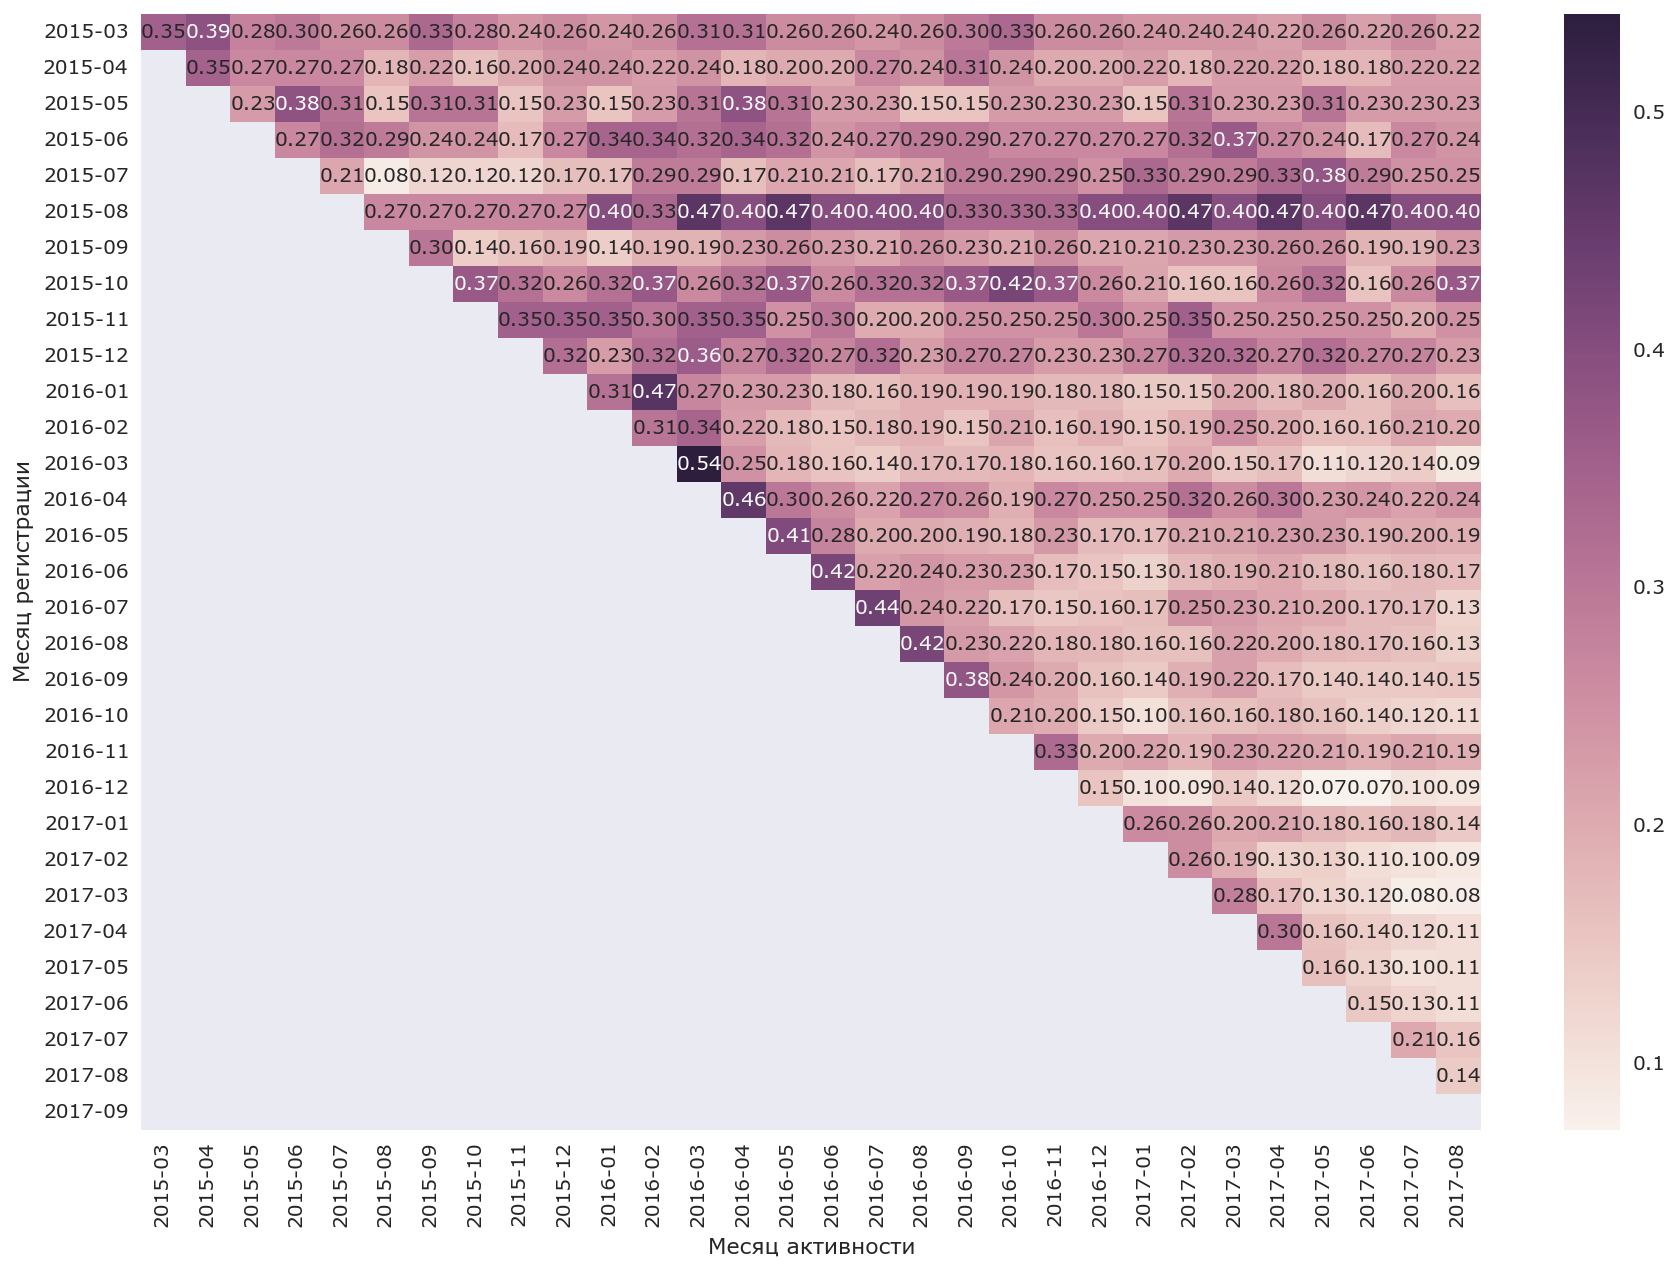

In [12]:
%run -n main.py
show_churn(messages)

8.1 . Активность в выходные в 2-3 раза ниже

8.2 Как будто провал около 19-20 по будням. В пятницу скорее

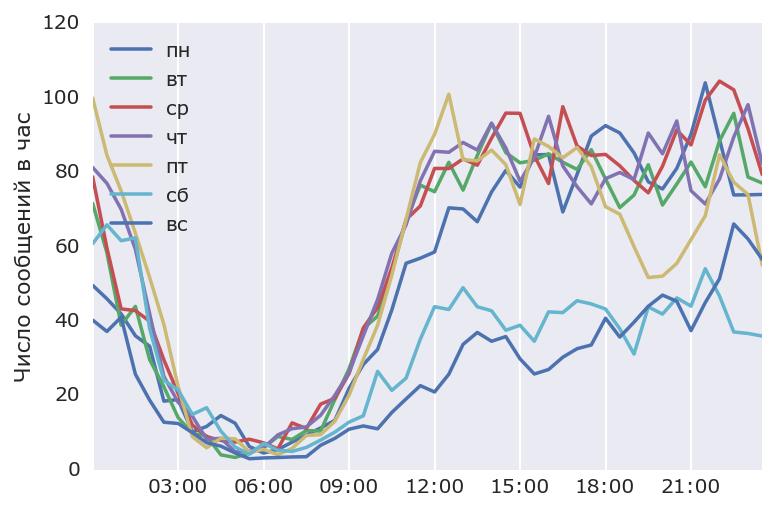

In [13]:
%run -n main.py
show_messages_during_day(text_messages)

9 . 10% девушек

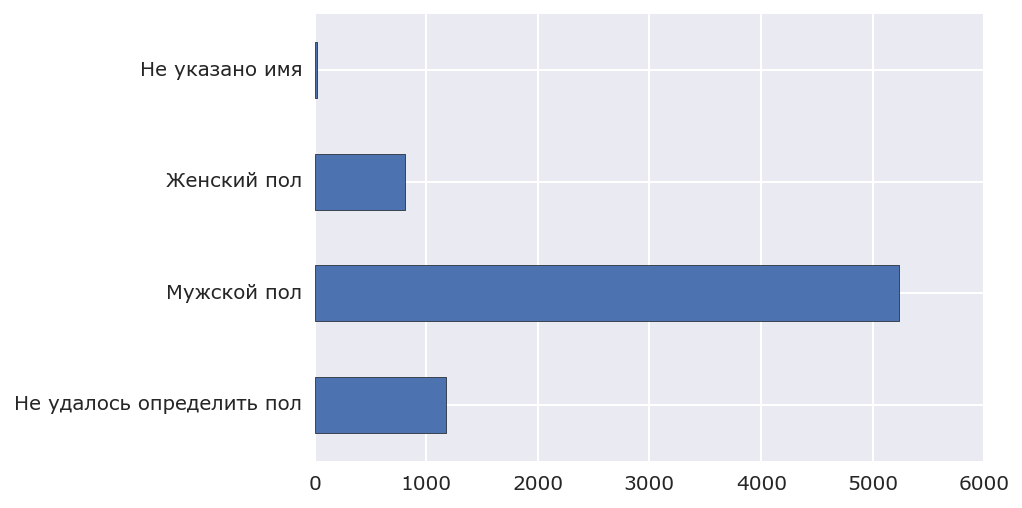

In [14]:
%run -n main.py
show_fio_gender_stats(users)

In [16]:
# %run -n main.py
# for gender in (FEMALE, MALE):
#     images = [_.image for _ in users if _.fio and get_fio_gender(_.fio) == gender and is_custom_image(_.image)]
#     random_seed(23)
#     show_images(sample(images, 8 * 5), 8)

In [46]:
%run -n main.py
order, table = get_tsne_table(text_messages)

In [47]:
%run -n main.py
channel_colors, colors = get_tsne_colors(table)

In [48]:
sizes = get_tsne_sizes(order)

In [49]:
%run -n main.py
points = tsne_users(table)

In [50]:
jitter = np.random.rand(len(order), 2)
jitter -= 0.5
jitter *= 2
points += jitter

In [51]:
labels, centers = cluster_tsne_users(points)

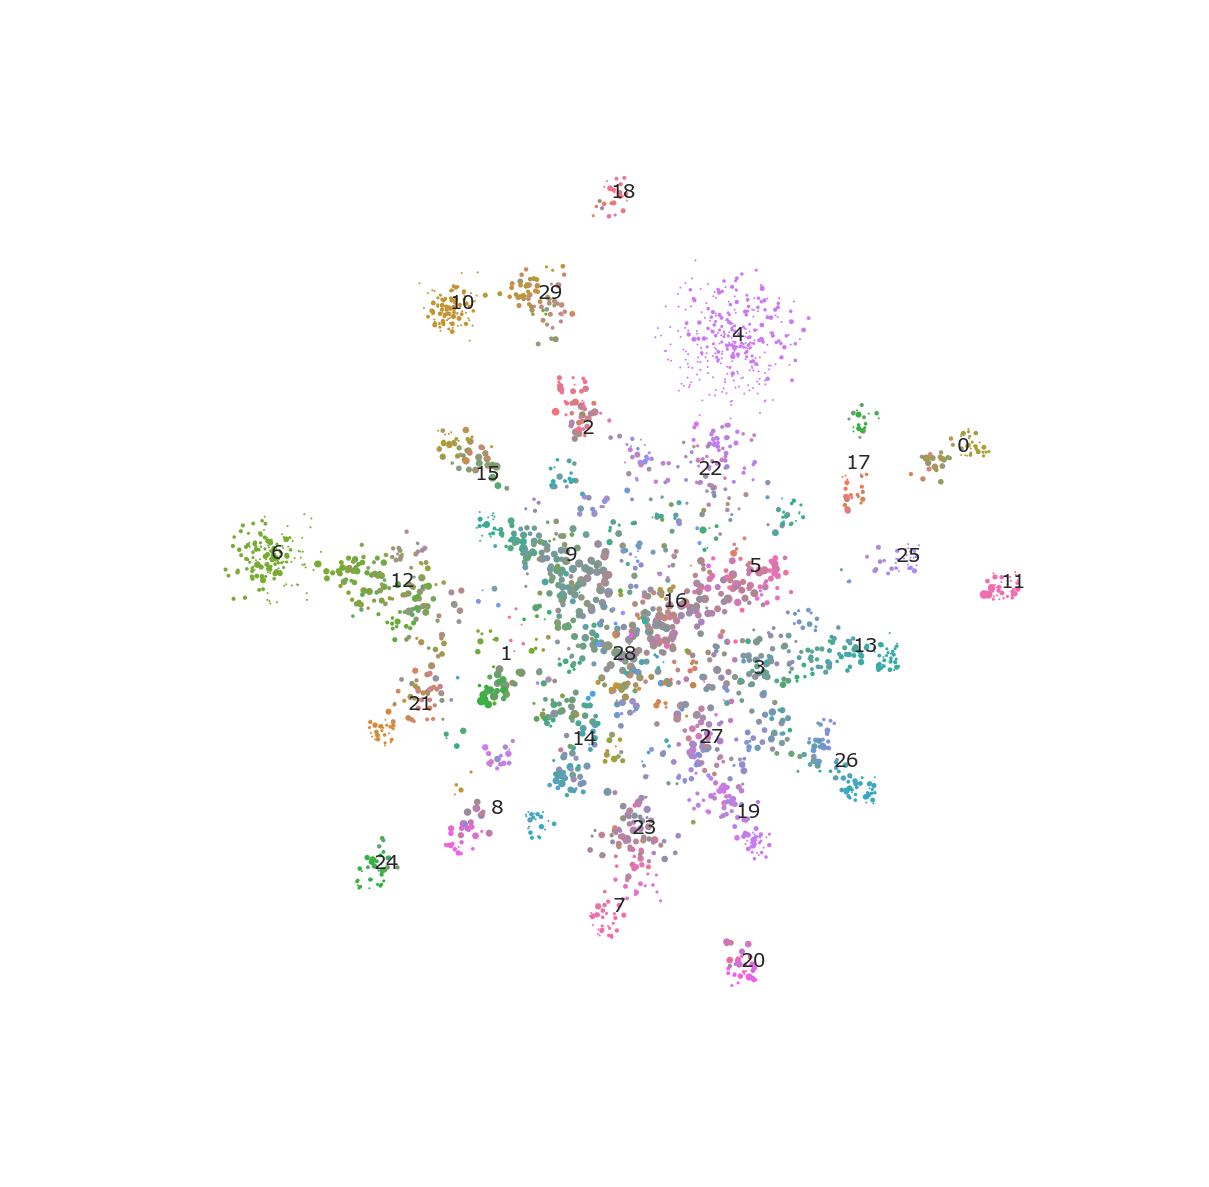

In [52]:
%run -n main.py
show_tsne_users(order, points, colors, sizes, labels, centers)

In [31]:
%run -n main.py
user_cards = list(get_user_cards(users, messages))

In [172]:
# %run -n main.py
# show_user_messages_per_date(text_messages, 'zagorulkinde')

In [171]:
# %run -n main.py
# mapping = {_.name: _ for _ in user_cards}        
# for name, cluster in zip(order.index, labels):
#     if cluster == 22:
#         record = mapping[name]
#         show_user_card(record)
#         print

In [16]:
reactions = list(get_reactions_top(text_messages))

In [83]:
# show_emojis(reactions[:500])

10 . Бесполезно, но прикольно: нелохо находятся похожие реакции

In [ ]:
edges = get_message_reaction_edges(text_messages)
edges = list(fold_bimodal(edges))
edges = [_ for _ in edges if _.source != _.target and _.target not in ('+1', 'heavy_plus_sign')]

In [84]:
# %run -n main.py
# show_reaction_edges(edges, [_ for _ in reactions if not is_custom_reaction(_)][:40])

In [85]:
# %run -n main.py
# show_reaction_edges(
#     edges,
#     [_ for _ in reactions if is_custom_reaction(_)],
#     size=7
# )

In [21]:
edges = list(get_user_order_edges(text_messages))
write_edges(edges)

In [38]:
edges = list(get_user_mention_edges(text_messages))
write_edges(edges)

In [23]:
edges = get_user_channel_edges([_ for _ in text_messages if _.channel.name not in DEFAULT_CHANNELS])
edges = list(fold_bimodal(edges))
write_edges([_ for _ in edges if _.weight > 0.01])

In [24]:
%run -n main.py
edges = invert_edges(get_user_channel_edges(text_messages))
edges = list(fold_bimodal(edges))
write_edges([_ for _ in edges if _.weight > 0.001])

In [221]:
# records = [_ for _ in text_messages if _.channel.name == 'lang_r']
# for record in records[-1000:]:
#     print record.user.name, record.posted
#     print '\t', record.text
#     show_emojis([_.name for _ in record.reactions])
#     print

# Viz

In [179]:
# %run -n main.py
# dump_channels_viz_data(channels, text_messages, top=7)

In [ ]:
# dump_users_viz_data(order.index, points, labels, user_cards)

In [90]:
# %run -n main.py
# dump_messages_by_time(text_messages)

In [41]:
# channel_messages = get_channel_messages(text_messages)

In [88]:
# counts = Counter()
# dates = defaultdict(list)
# for record in channel_messages['_random_flood']:
#     date = round_week(record.posted.date())
#     date = serialize_date(date)
#     dates[date].append(record)
#     counts[date] += 1
# table = pd.Series(counts)
# table.plot(kind='bar', figsize=(12, 4))

In [87]:
# counts = Counter()
# for record in dates['2016-02-29']:
#     date = record.posted
#     counts[date] += 1
# table = pd.Series(counts).resample('3600s').sum()
# table.plot()

In [86]:
# %run -n main.py
# for record in dates['2016-02-29']:
#     show_message(record)

In [26]:
# %run -n main.py
# dump_messages_by_channels(text_messages)

In [32]:
# %run -n main.py
# dump_users_by_time(messages)

In [53]:
%run -n main.py
user_cards = list(get_user_cards(users, messages))

In [54]:
%run -n main.py
dump_users_viz_data2(order.index, points, colors, channel_colors, user_cards)

In [55]:
%run -n main.py
dump_channels_viz_data2(channels, text_messages, top=7)